In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from prophet import Prophet 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, RNN
from keras.layers import Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/bangladesh-food-prices-2-1.xlsx')
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2006-12-15,Wheat flour - Retail,KG,cereals and tubers,23.0,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
1,2007-01-15,Wheat flour - Retail,KG,cereals and tubers,25.5,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
2,2007-02-15,Wheat flour - Retail,KG,cereals and tubers,25.5,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
3,2007-03-15,Wheat flour - Retail,KG,cereals and tubers,26.0,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
4,2007-04-15,Wheat flour - Retail,KG,cereals and tubers,26.0,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN


In [4]:
df=df.sort_values(by=['date'], ascending=True)

In [5]:
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1241,2004-01-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1242,2004-02-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1243,2004-03-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1244,2004-04-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1245,2004-05-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,38.873,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
948,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,61.167,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
1240,2018-08-15,Wheat flour - Retail,KG,cereals and tubers,31.979,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,58,15,5,1,116_58_15_5,NaN
2012,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,37.102,BDT,Bangladesh,Khulna,578,Khulna Division,118,60,15,5,1,118_60_15_5,NaN


In [6]:
df=df.query('`cmname` == "Lentils (masur) - Retail"')

In [7]:
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
796,2005-10-15,Lentils (masur) - Retail,KG,pulses and nuts,45.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
1414,2005-10-15,Lentils (masur) - Retail,KG,pulses and nuts,46.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,61,15,5,5,116_61_15_5,NaN
797,2005-11-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
798,2005-12-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2013,2006-01-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Khulna,578,Khulna Division,118,61,15,5,5,118_61_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,63.293,BDT,Bangladesh,Barisal,575,Barisal Division,112,61,15,5,5,112_61_15_5,NaN
2161,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,67.095,BDT,Bangladesh,Khulna,578,Khulna Division,118,61,15,5,5,118_61_15_5,NaN
3269,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,61.167,BDT,Bangladesh,Sylhet,580,Sylhet Division,122,61,15,5,5,122_61_15_5,NaN
1564,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,63.416,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,61,15,5,5,116_61_15_5,NaN


In [8]:

df.index  = df['date']
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
date,,,,,,,,,,,,,,,,,
2005-10-15,2005-10-15,Lentils (masur) - Retail,KG,pulses and nuts,45.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2005-10-15,2005-10-15,Lentils (masur) - Retail,KG,pulses and nuts,46.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,61,15,5,5,116_61_15_5,NaN
2005-11-15,2005-11-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2005-12-15,2005-12-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2006-01-15,2006-01-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Khulna,578,Khulna Division,118,61,15,5,5,118_61_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-15,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,63.293,BDT,Bangladesh,Barisal,575,Barisal Division,112,61,15,5,5,112_61_15_5,NaN
2018-08-15,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,67.095,BDT,Bangladesh,Khulna,578,Khulna Division,118,61,15,5,5,118_61_15_5,NaN
2018-08-15,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,61.167,BDT,Bangladesh,Sylhet,580,Sylhet Division,122,61,15,5,5,122_61_15_5,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 856 entries, 2005-10-15 to 2018-08-15
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      856 non-null    datetime64[ns]
 1   cmname    856 non-null    object        
 2   unit      856 non-null    object        
 3   category  856 non-null    object        
 4   price     856 non-null    float64       
 5   currency  856 non-null    object        
 6   country   856 non-null    object        
 7   admname   856 non-null    object        
 8   adm1id    856 non-null    int64         
 9   mktname   856 non-null    object        
 10  mktid     856 non-null    int64         
 11  cmid      856 non-null    int64         
 12  ptid      856 non-null    int64         
 13  umid      856 non-null    int64         
 14  catid     856 non-null    int64         
 15  sn        856 non-null    object        
 16  default   0 non-null      float64       
dt

In [10]:
values = DataFrame(df['price'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.925208  0.903417  0.769031  0.931858
t+1   0.925208  1.000000  0.921002  0.803843  0.921580
t+5   0.903417  0.921002  1.000000  0.840462  0.897639
t+10  0.769031  0.803843  0.840462  1.000000  0.759831
t+30  0.931858  0.921580  0.897639  0.759831  1.000000


Split train and test data

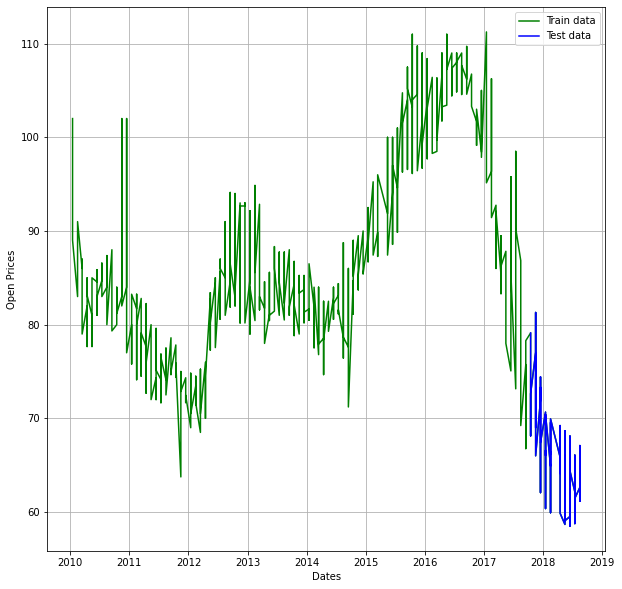

In [11]:
train_data, test_data = df[0:-60], df[-60:]
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df['price'].tail(600), 'green', label='Train data')
plt.plot(test_data['price'], 'blue', label='Test data')
plt.legend()

Show the closing_price column data

In [12]:
df['price']

date
2005-10-15    45.000
2005-10-15    46.000
2005-11-15    43.000
2005-12-15    43.000
2006-01-15    43.000
               ...  
2018-08-15    63.293
2018-08-15    67.095
2018-08-15    61.167
2018-08-15    63.416
2018-08-15    61.167
Name: price, Length: 856, dtype: float64

We take 60 days data to test our models

In [13]:
test_data.price.tail(30) 

date
2018-04-15    65.868
2018-04-15    64.428
2018-04-15    64.110
2018-04-15    67.919
2018-04-15    69.229
2018-04-15    59.875
2018-05-15    58.678
2018-05-15    63.918
2018-05-15    68.676
2018-05-15    66.300
2018-05-15    66.654
2018-05-15    59.070
2018-06-15    59.530
2018-06-15    63.057
2018-06-15    62.625
2018-06-15    68.109
2018-06-15    58.500
2018-06-15    64.398
2018-07-15    62.167
2018-07-15    62.625
2018-07-15    58.768
2018-07-15    66.073
2018-07-15    64.130
2018-07-15    61.460
2018-08-15    62.625
2018-08-15    63.293
2018-08-15    67.095
2018-08-15    61.167
2018-08-15    63.416
2018-08-15    61.167
Name: price, dtype: float64

In [14]:
train_data.price.tail(30) 

date
2017-04-15    89.5000
2017-04-15    88.2500
2017-04-15    86.2500
2017-05-15    87.8333
2017-05-15    87.7500
2017-05-15    81.7500
2017-05-15    86.5000
2017-05-15    82.3846
2017-05-15    78.0000
2017-06-15    75.0633
2017-06-15    95.7975
2017-06-15    85.8567
2017-06-15    81.5214
2017-06-15    85.4925
2017-07-15    73.1525
2017-07-15    77.1067
2017-07-15    98.5000
2017-07-15    88.6950
2017-07-15    90.2692
2017-08-15    86.8413
2017-08-15    71.6450
2017-08-15    76.8000
2017-08-15    74.5317
2017-08-15    69.2325
2017-09-15    75.7417
2017-09-15    72.0200
2017-09-15    66.7700
2017-09-15    73.3717
2017-09-15    70.6180
2017-09-15    78.2900
Name: price, dtype: float64

MSE: 225.74044076796872
MAE: 14.151100525700928
RMSE: 15.024661086625839


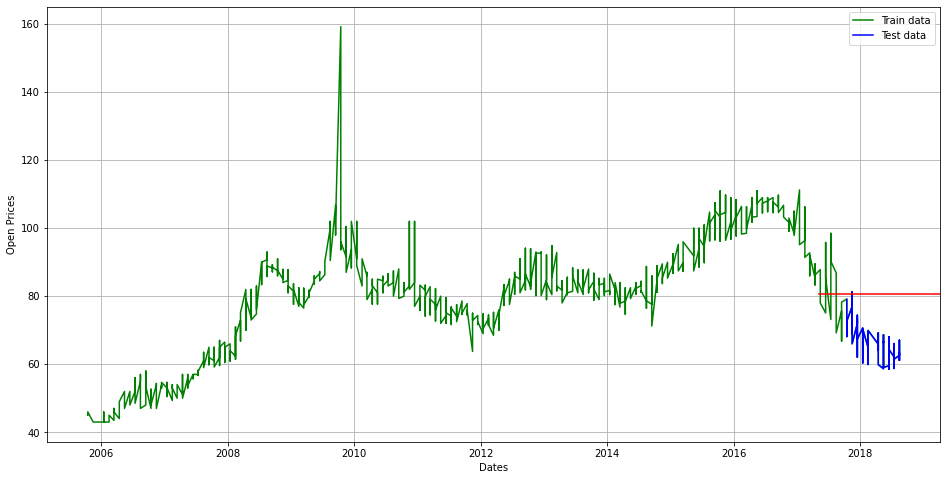

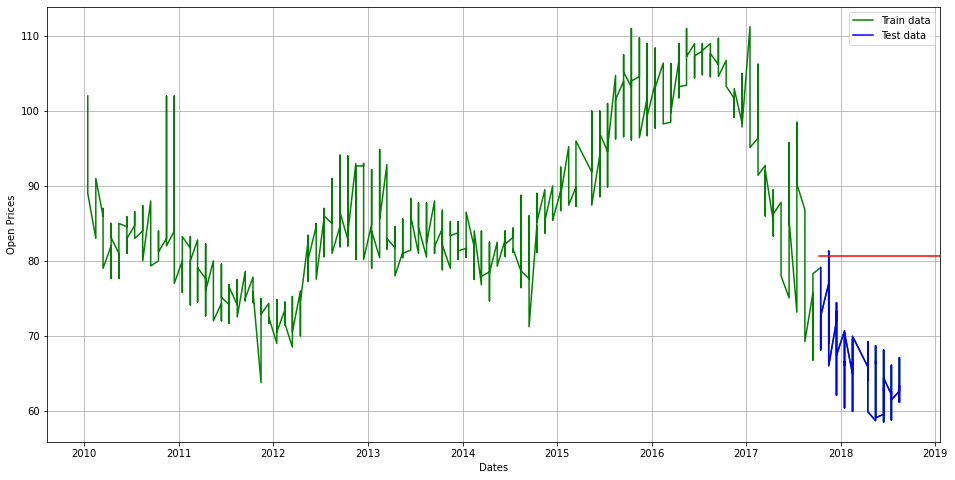

In [15]:
mean_value = df['price'].mean() # calculation of mean price

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df['price'], 'green', label='Train data')
plt.plot(test_data['price'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df['price'].tail(600), 'green', label='Train data')
plt.plot(test_data['price'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['price'], np.full(len(test_data), mean_value))))
print('MAE: '+str(mean_absolute_error(test_data['price'], np.full(len(test_data), mean_value))))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['price'], np.full(len(test_data), mean_value)))))

Train data for ARIMA model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


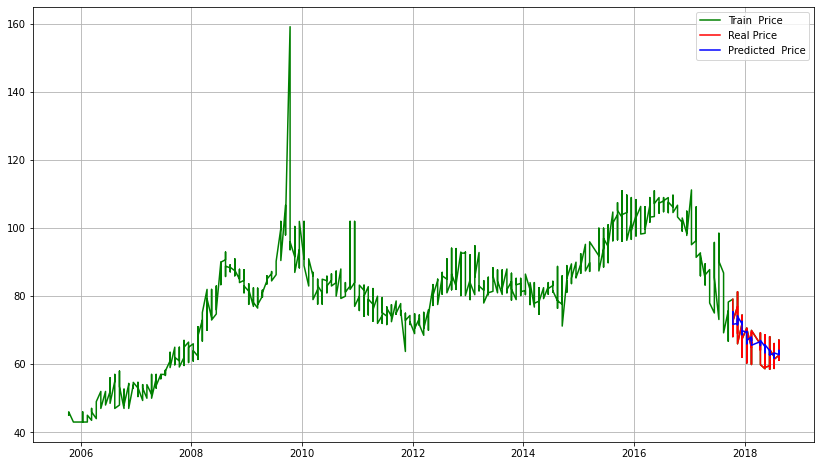

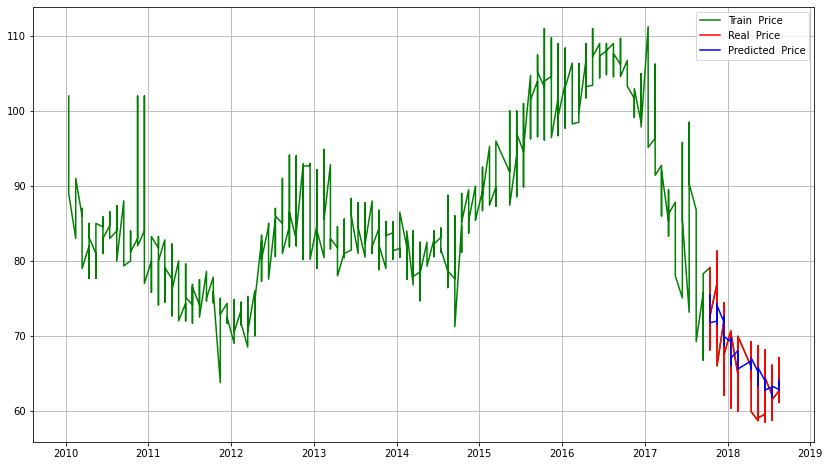

MSE: 16.607951291743518
MAE: 3.2642232166018528
RMSE: 4.075285424573783


In [16]:
train_arima = train_data['price']
test_arima = test_data['price']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    
plt.figure(figsize=(14,8))
plt.plot(df.index, df['price'], color='green', label = 'Train  Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted  Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train  Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real  Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted  Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

In [17]:
test_data.reset_index(drop=True, inplace=True)

Predicted result for ARIMA model

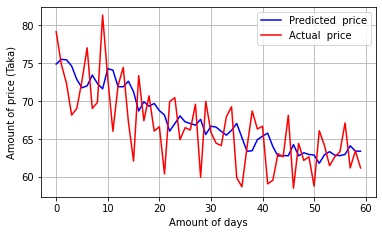

In [18]:
#y_test = df.iloc[int(7200): ,0:1].values
plt.figure(figsize=(6,3.5))
#plt.suptitle('Sine and cosine waves', fontsize=13)
plt.plot(predictions, color='blue', label='Predicted  price')
plt.plot(test_data['price'], color ='red', label='Actual  price')
plt.xlabel('Amount of days', fontsize=10)
plt.ylabel('Amount of price (Taka)', fontsize=10)
#plt.xticks(rotation=0,fontsize=12)
#plt.yticks(rotation=0,fontsize=12)
plt.grid(True)
#plt.savefig('ARIMA_Close_Price.jpeg')
plt.legend()
plt.show()

In [19]:
df.index  = df['date']
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
date,,,,,,,,,,,,,,,,,
2005-10-15,2005-10-15,Lentils (masur) - Retail,KG,pulses and nuts,45.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2005-10-15,2005-10-15,Lentils (masur) - Retail,KG,pulses and nuts,46.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,61,15,5,5,116_61_15_5,NaN
2005-11-15,2005-11-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2005-12-15,2005-12-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
2006-01-15,2006-01-15,Lentils (masur) - Retail,KG,pulses and nuts,43.000,BDT,Bangladesh,Khulna,578,Khulna Division,118,61,15,5,5,118_61_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-15,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,63.293,BDT,Bangladesh,Barisal,575,Barisal Division,112,61,15,5,5,112_61_15_5,NaN
2018-08-15,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,67.095,BDT,Bangladesh,Khulna,578,Khulna Division,118,61,15,5,5,118_61_15_5,NaN
2018-08-15,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,61.167,BDT,Bangladesh,Sylhet,580,Sylhet Division,122,61,15,5,5,122_61_15_5,NaN


Pre-process data for Prophet model

In [20]:
ph_df_train = train_data.drop(['cmname', 'unit', 'category','currency',
                               'country','admname','adm1id','mktname','mktid',
                               'cmid','ptid','umid','catid','sn','default'], axis=1)
ph_df_train['date'] = ph_df_train.index
ph_df_train.rename(columns={'price': 'y', 'date': 'ds'}, inplace=True)

prop = Prophet(changepoint_prior_scale=0.1)
prop.fit(ph_df_train)
# Create Future dates
future_prices = prop.make_future_dataframe(periods=73)

# Predict Prices
forecast = prop.predict(future_prices)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnyj7cov/r3f0ykrn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnyj7cov/ra4006eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55363', 'data', 'file=/tmp/tmpcnyj7cov/r3f0ykrn.json', 'init=/tmp/tmpcnyj7cov/ra4006eh.json', 'output', 'file=/tmp/tmp5rsszygo/prophet_model-20220905084103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
forecast['yhat']

0      46.558208
1      45.208773
2      45.786022
3      45.096507
4      44.288718
         ...    
211    86.906193
212    86.358780
213    85.820413
214    85.305359
215    84.828272
Name: yhat, Length: 216, dtype: float64

In [22]:
test_data.index  = test_data['date']

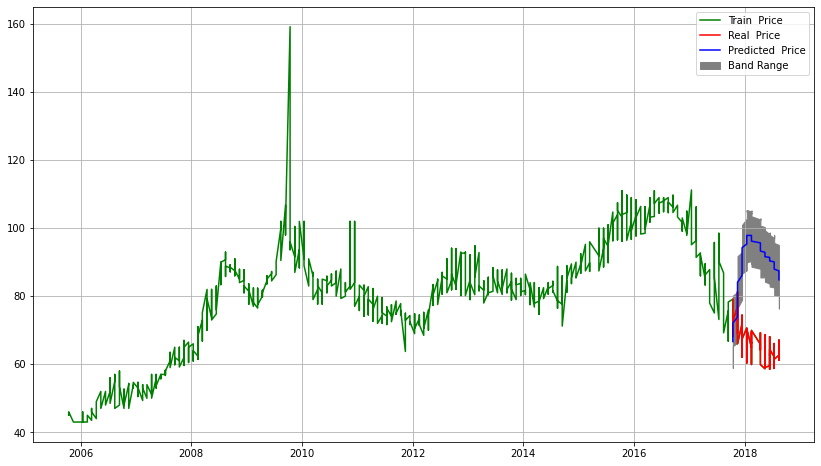

In [23]:
plt.figure(figsize=(14,8))
plt.plot(df.index, df['price'], color='green', label = 'Train  Price')
plt.plot(test_data.index, test_data['price'], color = 'red', label = 'Real  Price')
plt.plot(test_data.index, forecast['yhat'][-60:], color = 'blue', label = 'Predicted  Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-60:], forecast['yhat_upper'][-60:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

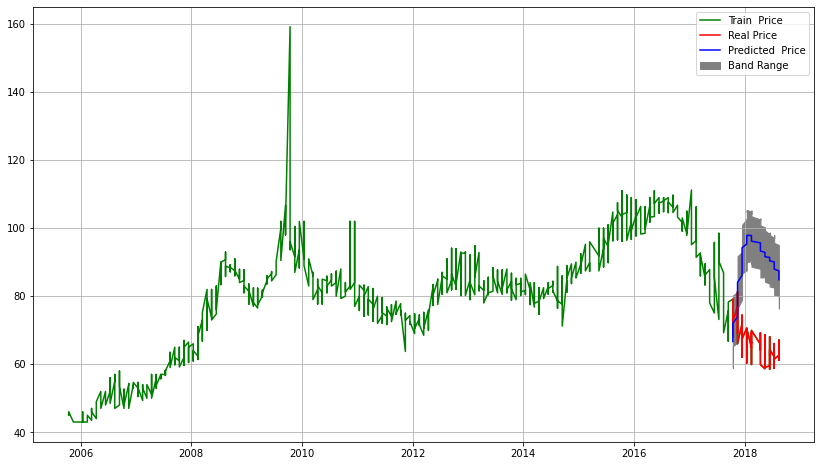

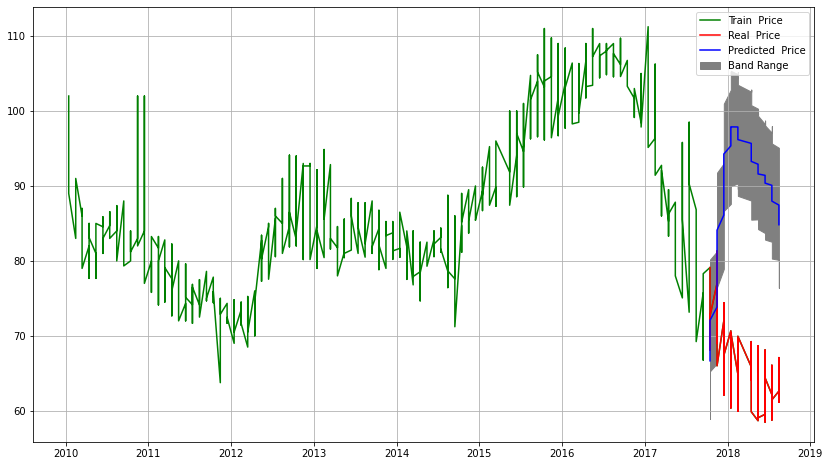

MSE: 619.9009944117041
MAE: 22.923874162006488
RMSE: 24.897811036549058


In [24]:
plt.figure(figsize=(14,8))
plt.plot(df.index, df['price'], color='green', label = 'Train  Price')
plt.plot(test_data.index, test_data['price'], color = 'red', label = 'Real Price')
plt.plot(test_data.index, forecast['yhat'][-60:], color = 'blue', label = 'Predicted  Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-60:], forecast['yhat_upper'][-60:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train  Price')
plt.plot(test_data.index, test_data['price'], color = 'red', label = 'Real  Price')
plt.plot(test_data.index, forecast['yhat'][-60:], color = 'blue', label = 'Predicted  Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-60:], forecast['yhat_upper'][-60:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(test_data['price'], forecast['yhat'][-60:])))
print('MAE: '+str(mean_absolute_error(test_data['price'], forecast['yhat'][-60:])))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['price'], forecast['yhat'][-60:]))))

In [25]:
train = train_data.iloc[:, 4:5].values # selecting open prices
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 
# Train dataset
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

LSTM model training

In [26]:
model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
#model.add(Dropout(0.2))

model.add(LSTM(units = 50))
#model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
50/50 [==============================] - 4s 5ms/step - loss: 0.0195
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 10/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 11/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 12/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 13/100
50/50 [=================

In [27]:
# this will be used later while comparing and visualization
real_stock_price = test_data.iloc[:,4:5].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on timesteps previous dates  
combine = pd.concat((train_data['price'], test_data['price']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Predicted result for LSTM model

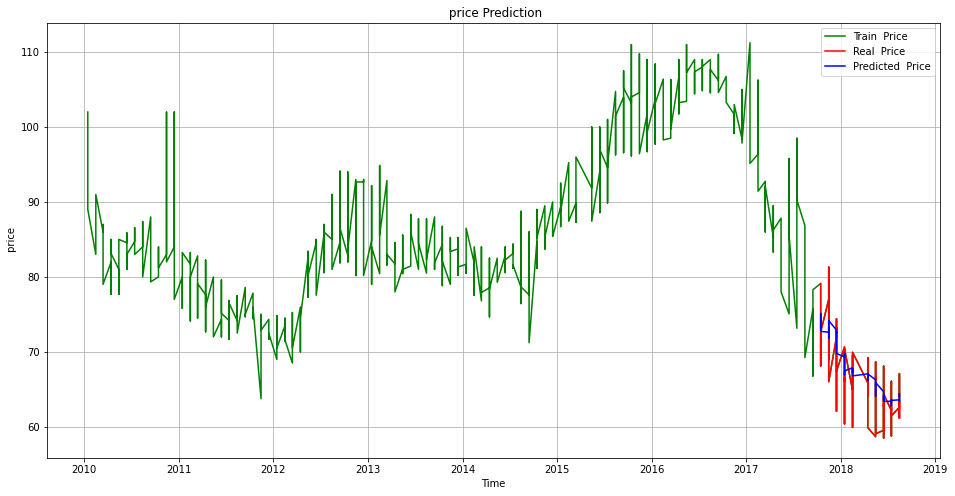

MSE: 16.97985768291027
MAE: 3.288749495340982
RMSE: 4.120662286927948


In [28]:
plt.figure(figsize=(16,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train  Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real  Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted  Price')
plt.title(' price Prediction')
plt.xlabel('Time')
plt.ylabel(' price')
plt.legend()
plt.grid(True)
#plt.savefig('lstm_30.pdf')
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))

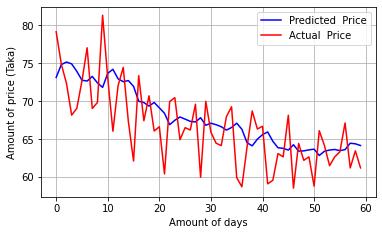

In [29]:
test_data.reset_index(drop=True, inplace=True)
#y_test = df.iloc[int(7200): ,0:1].values
plt.figure(figsize=(6,3.5))
#plt.suptitle('Sine and cosine waves', fontsize=13)
plt.plot(predicted_stock_price, color='blue', label='Predicted  Price')
plt.plot(test_data['price'], color ='red', label='Actual  Price')
plt.xlabel('Amount of days', fontsize=10)
plt.ylabel('Amount of price (Taka)', fontsize=10)
#plt.xticks(rotation=0,fontsize=12)
#plt.yticks(rotation=0,fontsize=12)
plt.grid(True)
#plt.savefig('LSTM_opening_price.jpeg')
plt.legend()
plt.show()

Training data by GRU model

In [30]:
model = Sequential()

# Adding the first GRU layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) GRU layer ahead in the network.
model.add(GRU(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.2))

model.add(GRU(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 16)

Epoch 1/200
50/50 [==============================] - 3s 5ms/step - loss: 0.0193
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 5/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 7/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 8/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 9/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 10/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 11/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 12/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 13/200
50/50 [=================

In [31]:
# this will be used later while comparing and visualization
real_stock_price_GRU = test_data.iloc[:,4:5].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on timesteps previous dates  
combine = pd.concat((train_data['price'], test_data['price']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_GRU = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price_GRU = scaler.inverse_transform(predicted_stock_price_GRU)

In [32]:
test_data.index  = test_data['date']

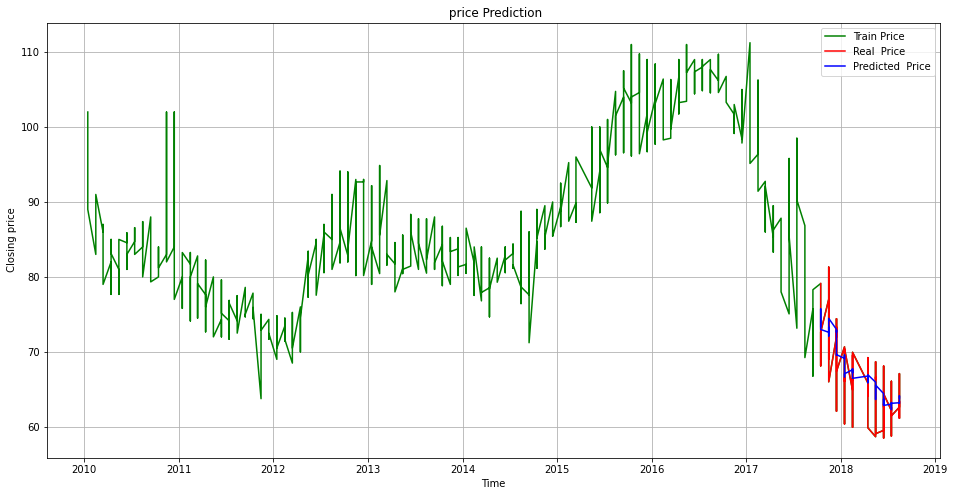

MSE: 17.178477697002084
MAE: 3.3088534250895174
RMSE: 4.144692714424326


In [33]:
plt.figure(figsize=(16,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train Price')
plt.plot(test_data.index, real_stock_price_GRU, color = 'red', label = 'Real  Price')
plt.plot(test_data.index, predicted_stock_price_GRU, color = 'blue', label = 'Predicted  Price')
plt.title(' price Prediction')
plt.xlabel('Time')
plt.ylabel(' Closing price')
plt.legend()
plt.grid(True)
plt.savefig('lstm_30.pdf')
plt.show()


mse = mean_squared_error(real_stock_price_GRU, predicted_stock_price_GRU)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price_GRU, predicted_stock_price_GRU)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_stock_price_GRU, predicted_stock_price_GRU))
print('RMSE: '+str(rmse))

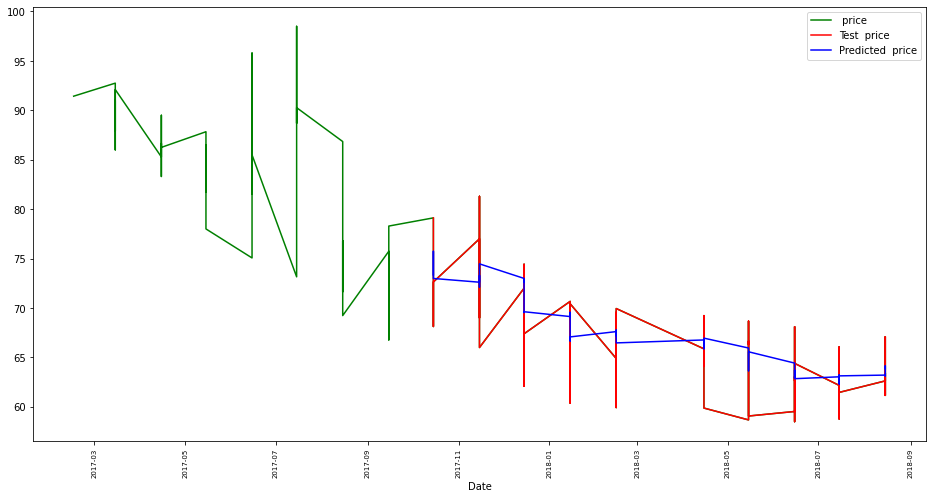

In [34]:
plt.figure(figsize=(16,8))
#print('Lag: %s' % model_fit.k_ar)
plt.plot(df.index[-100:], df['price'].tail(100), color='green', label=' price')
plt.plot(test_data.index, test_data['price'], color='red', label='Test  price')
plt.plot(test_data.index, predicted_stock_price_GRU, color='blue', label='Predicted  price')
plt.xlabel('Date', fontsize=10)
plt.xticks(rotation=90,fontsize=7)
#plt.grid(True)
plt.legend()